In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline
from tensorflow import random
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization,Flatten
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./014data_mid.csv', names=['R','S','T','U','V','W','target'])
df.head()

,R,S,T,U,V,W,target
0,464.626129,729.220886,350.260651,639.945679,2839.020020,11789.40234,89
1,465.712616,725.102966,350.260651,641.529175,2846.915039,11798.15137,89
2,466.799072,721.808655,347.722534,633.611633,2839.020020,11793.77734,89
3,461.366730,717.690735,346.876495,632.028076,2825.203857,11674.56152,89
4,461.366730,716.043579,346.030457,631.236328,2818.295898,11647.21777,89


In [3]:
#準備X & Y array
X = df[['R','S','T', 'U', 'V', 'W']]
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
# 創建模型結構：輸入層的特徵維數爲13；1層k個神經元的relu隱藏層；線性的輸出層；

for k in [5,20,50]:  # 網格搜索超參數：神經元數k
    
    model = Sequential()

    model.add(BatchNormalization(input_dim=6))  # 輸入層 批標準化 
    
#   Dense 全連接層
    model.add(Dense(k,  
                    kernel_initializer='random_uniform',   # 均勻初始化
                    activation='relu',                     # relu激活函數
                    kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),  # L1及L2 正則項
                    use_bias=True))   # 隱藏層
    model.add(Dense(k,   
                    activation='relu', # relu激活函數
                    use_bias=True))   # 隱藏層
    model.add(Dense(k,   
                    activation='relu', # relu激活函數
                    use_bias=True))   # 隱藏層
    
    model.compile(optimizer='adam', loss='mse')
    
    model.add(Dropout(0.1)) # dropout法 丟棄神經元

    model.add(Dense(1,use_bias=True))  # 輸出層

Epoch 1/500
3/3 [==============================] - 1s 74ms/step - loss: 18050.1289 - val_loss: 16858.9531
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 18032.7754 - val_loss: 14792.7861
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 18017.7949 - val_loss: 13473.2617
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 18001.4785 - val_loss: 12418.0498
Epoch 5/500
3/3 [==============================] - 0s 12ms/step - loss: 17981.1270 - val_loss: 11257.4482
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 17956.4688 - val_loss: 10031.7480
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 17924.1992 - val_loss: 8664.7539
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 17885.9258 - val_loss: 7181.0894
Epoch 9/500
3/3 [==============================] - 0s 12ms/step - loss: 17839.1348 - val_loss: 5590.3687
Epoch 10/500
3/3 [==============================]

3/3 [==============================] - 0s 12ms/step - loss: 437.5120 - val_loss: 206815.3281
Epoch 78/500
3/3 [==============================] - 0s 12ms/step - loss: 463.2705 - val_loss: 191835.2656
Epoch 79/500
3/3 [==============================] - 0s 11ms/step - loss: 462.7285 - val_loss: 177140.5469
Epoch 80/500
3/3 [==============================] - 0s 12ms/step - loss: 466.9722 - val_loss: 162303.7656
Epoch 81/500
3/3 [==============================] - 0s 12ms/step - loss: 454.2067 - val_loss: 149799.2500
Epoch 82/500
3/3 [==============================] - 0s 12ms/step - loss: 494.6523 - val_loss: 138280.5312
Epoch 83/500
3/3 [==============================] - 0s 12ms/step - loss: 442.3682 - val_loss: 127546.6016
Epoch 84/500
3/3 [==============================] - 0s 12ms/step - loss: 431.8855 - val_loss: 118111.0000
Epoch 85/500
3/3 [==============================] - 0s 12ms/step - loss: 458.2785 - val_loss: 109529.1875
Epoch 86/500
3/3 [==============================] - 0s 12ms

Epoch 155/500
3/3 [==============================] - 0s 12ms/step - loss: 236.8643 - val_loss: 902.0782
Epoch 156/500
3/3 [==============================] - 0s 12ms/step - loss: 236.5170 - val_loss: 842.8094
Epoch 157/500
3/3 [==============================] - 0s 13ms/step - loss: 246.8638 - val_loss: 805.0586
Epoch 158/500
3/3 [==============================] - 0s 12ms/step - loss: 209.3154 - val_loss: 765.4153
Epoch 159/500
3/3 [==============================] - 0s 13ms/step - loss: 232.3035 - val_loss: 704.7546
Epoch 160/500
3/3 [==============================] - 0s 12ms/step - loss: 256.4967 - val_loss: 615.4542
Epoch 161/500
3/3 [==============================] - 0s 13ms/step - loss: 223.0772 - val_loss: 586.2448
Epoch 162/500
3/3 [==============================] - 0s 13ms/step - loss: 224.7106 - val_loss: 563.2476
Epoch 163/500
3/3 [==============================] - 0s 13ms/step - loss: 210.5777 - val_loss: 555.0706
Epoch 164/500
3/3 [==============================] - 0s 13ms/ste

3/3 [==============================] - 0s 12ms/step - loss: 153.3071 - val_loss: 49.0471
Epoch 235/500
3/3 [==============================] - 0s 12ms/step - loss: 157.0262 - val_loss: 44.5720
Epoch 236/500
3/3 [==============================] - 0s 12ms/step - loss: 138.9185 - val_loss: 41.5049
Epoch 237/500
3/3 [==============================] - 0s 12ms/step - loss: 151.2321 - val_loss: 41.5114
Epoch 238/500
3/3 [==============================] - 0s 12ms/step - loss: 142.0515 - val_loss: 43.9087
Epoch 239/500
3/3 [==============================] - 0s 12ms/step - loss: 149.9463 - val_loss: 45.2401
Epoch 240/500
3/3 [==============================] - 0s 11ms/step - loss: 140.7559 - val_loss: 43.2280
Epoch 241/500
3/3 [==============================] - 0s 12ms/step - loss: 142.5221 - val_loss: 41.3393
Epoch 242/500
3/3 [==============================] - 0s 12ms/step - loss: 146.0500 - val_loss: 40.2756
Epoch 243/500
3/3 [==============================] - 0s 12ms/step - loss: 140.0550 - va

3/3 [==============================] - 0s 11ms/step - loss: 119.4131 - val_loss: 29.2302
Epoch 314/500
3/3 [==============================] - 0s 12ms/step - loss: 124.2186 - val_loss: 28.8793
Epoch 315/500
3/3 [==============================] - 0s 12ms/step - loss: 126.2697 - val_loss: 26.9117
Epoch 316/500
3/3 [==============================] - 0s 12ms/step - loss: 128.7331 - val_loss: 26.1038
Epoch 317/500
3/3 [==============================] - 0s 13ms/step - loss: 125.3204 - val_loss: 26.2187
Epoch 318/500
3/3 [==============================] - 0s 11ms/step - loss: 119.9059 - val_loss: 26.0318
Epoch 319/500
3/3 [==============================] - 0s 12ms/step - loss: 124.7455 - val_loss: 27.6043
Epoch 320/500
3/3 [==============================] - 0s 12ms/step - loss: 123.6866 - val_loss: 27.2007
Epoch 321/500
3/3 [==============================] - 0s 11ms/step - loss: 126.0402 - val_loss: 26.7626
Epoch 322/500
3/3 [==============================] - 0s 12ms/step - loss: 120.3136 - va

3/3 [==============================] - 0s 12ms/step - loss: 114.2218 - val_loss: 20.5520
Epoch 393/500
3/3 [==============================] - 0s 12ms/step - loss: 120.7797 - val_loss: 20.4682
Epoch 394/500
3/3 [==============================] - 0s 12ms/step - loss: 120.0625 - val_loss: 20.4626
Epoch 395/500
3/3 [==============================] - 0s 12ms/step - loss: 109.1566 - val_loss: 20.6139
Epoch 396/500
3/3 [==============================] - 0s 12ms/step - loss: 119.6897 - val_loss: 20.3556
Epoch 397/500
3/3 [==============================] - 0s 12ms/step - loss: 107.0529 - val_loss: 20.5930
Epoch 398/500
3/3 [==============================] - 0s 12ms/step - loss: 108.4171 - val_loss: 21.5259
Epoch 399/500
3/3 [==============================] - 0s 12ms/step - loss: 108.9943 - val_loss: 21.6508
Epoch 400/500
3/3 [==============================] - 0s 12ms/step - loss: 106.6535 - val_loss: 20.3961
Epoch 401/500
3/3 [==============================] - 0s 13ms/step - loss: 115.1598 - va

Epoch 472/500
3/3 [==============================] - 0s 12ms/step - loss: 118.5563 - val_loss: 17.7575
Epoch 473/500
3/3 [==============================] - 0s 12ms/step - loss: 130.5046 - val_loss: 17.7922
Epoch 474/500
3/3 [==============================] - 0s 12ms/step - loss: 114.9464 - val_loss: 18.0627
Epoch 475/500
3/3 [==============================] - 0s 11ms/step - loss: 107.8987 - val_loss: 18.6265
Epoch 476/500
3/3 [==============================] - 0s 12ms/step - loss: 113.0730 - val_loss: 18.2811
Epoch 477/500
3/3 [==============================] - 0s 12ms/step - loss: 102.8804 - val_loss: 17.8254
Epoch 478/500
3/3 [==============================] - 0s 12ms/step - loss: 108.4973 - val_loss: 18.9119
Epoch 479/500
3/3 [==============================] - 0s 12ms/step - loss: 92.9449 - val_loss: 18.2193
Epoch 480/500
3/3 [==============================] - 0s 12ms/step - loss: 105.9866 - val_loss: 17.8297
Epoch 481/500
3/3 [==============================] - 0s 12ms/step - loss: 

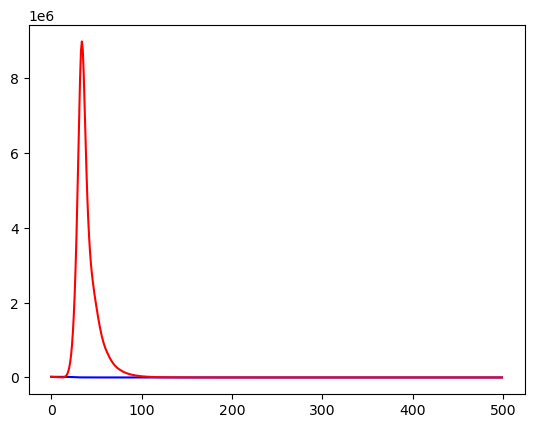

In [6]:
# 訓練模型
history = model.fit(X_train, 
                    y_train, 
                    epochs=500,              # 訓練迭代次數
                    batch_size=300,           # 每epoch採樣的batch大小
                    validation_split=0.1,   # 從訓練集再拆分驗證集，作爲早停的衡量指標
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=50)],    #早停法
                    verbose=True)  # 不輸出過程  

    
print("驗證集最優結果：",min(history.history['val_loss']))
model.summary()   #打印模型概述信息
# 模型評估：擬合效果
plt.plot(history.history['loss'],c='blue')    # 藍色線訓練集損失
plt.plot(history.history['val_loss'],c='red') # 紅色線驗證集損失
plt.show()

8/8 [==============================] - 0s 838us/step


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


正確標籤： 198      89
328     143
45       89
263     143
621     148
       ... 
1127    126
55       89
500     189
687     148
907      80
Name: target, Length: 240, dtype: int64
模型預測： [ 86.01741  147.4557    87.149086 140.35011  139.63792  187.9564
  87.83628   80.94374  130.30843  121.93383  144.48904  118.55062
 141.2924   140.5734   142.71039  195.08829   90.59237  142.90982
  84.69504  126.01652   82.61176   80.605705 129.32109  125.575035
  79.608315  85.975784 148.53519  142.13991   76.80721  129.89743
  88.836555  85.40055   83.17738  145.71901  189.27557  112.88615
 141.23796   83.267006  84.3819   186.21323  132.54463   87.20058
 182.14561   83.41795  147.20715  184.1212   142.80911  132.25304
 137.24005  146.99458  146.68675  136.01688  127.21616   80.716606
 123.45861  123.70883   83.40977  140.13994  191.04172   81.78794
  84.00879  195.62975   99.53982  146.48624  125.57161  191.6436
 185.17644  147.46213  147.71382  131.09444  182.57266   79.26718
 147.27916  183.53491  1

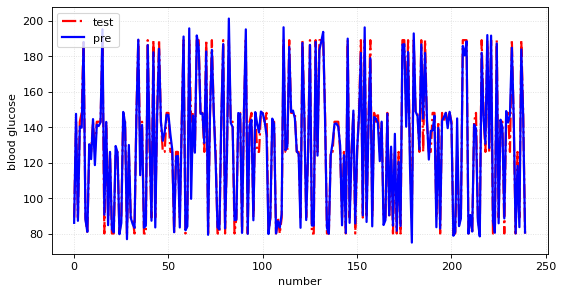

In [7]:
# 模型評估：測試集預測結果
y_pre = model.predict(X_test)[:,0]

print("正確標籤：",y_test)
print("模型預測：",y_pre )

print("實際與預測值的差異：",mean_squared_error(y_test,y_pre ))

#繪圖表示
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 設置圖形大小
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(y_test)), y_test, ls='-.',lw=2,c='r',label='test')
plt.plot(range(len(y_pre)), y_pre, ls='-',lw=2,c='b',label='pre')

# 繪製網格
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number') #設置x軸的標籤文本
plt.ylabel('blood glucose') #設置y軸的標籤文本

# 展示
plt.show()

In [8]:
from sklearn import metrics

In [9]:
#Mean Squared Error(MSE)
metrics.mean_squared_error(y_test,y_pre)

31.789024170293608

In [10]:
#Mean Absolute Error(MAE)代表平均誤差
metrics.mean_absolute_error(y_test,y_pre)

3.629096794128418

In [11]:
#Root Mean Squared Error(RMSE)，MSE的開根號
np.sqrt(metrics.mean_squared_error(y_test,y_pre))

5.638175606549836

In [12]:
df = pd.DataFrame({'y_pre':y_pre})
df.to_csv("NeuralNetwork.output.csv",index=False,sep=',')
df = pd.DataFrame({'y_test':y_test})
df.to_csv("NeuralNetwork.test.csv",index=False,sep=',')

In [13]:
# import pickle
# import pandas as pd
# loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [14]:
# dataset = pd.read_csv('test1.csv')
# # 切分数据集
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # 切分数据集为训练集合测试集
# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
# # 使用pickle加載模型文件
# loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

# # 使用模型對測試數據進行預測
# y_pred = loaded_model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# # evaluate predictions 評估模型
# accuracy = accuracy_score(y_test, predictions)